In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/'):
     print(dirname);

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/
/kaggle/src
/kaggle/lib
/kaggle/lib/kaggle
/kaggle/input
/kaggle/input/UBC-OCEAN
/kaggle/input/UBC-OCEAN/test_thumbnails
/kaggle/input/UBC-OCEAN/train_images
/kaggle/input/UBC-OCEAN/train_thumbnails
/kaggle/input/UBC-OCEAN/test_images
/kaggle/working


In [2]:
!pip freeze --local | grep tensorflow
!pip freeze --local | grep opencv
!pip freeze --local | grep matplot
!pip freeze --local | grep tifffile


tensorflow==2.12.0
tensorflow-addons==0.21.0
tensorflow-cloud==0.1.16
tensorflow-datasets==4.9.2
tensorflow-decision-forests==1.4.0
tensorflow-estimator==2.12.0
tensorflow-hub==0.12.0
tensorflow-io==0.32.0
tensorflow-io-gcs-filesystem==0.32.0
tensorflow-metadata==0.14.0
tensorflow-probability==0.20.1
tensorflow-serving-api==2.12.1
tensorflow-text==2.12.1
tensorflow-transform==0.14.0
tensorflowjs==3.15.0
opencv-contrib-python==4.8.0.76
opencv-python==4.8.0.76
opencv-python-headless==4.8.0.76
matplotlib @ file:///home/conda/feedstock_root/build_artifacts/matplotlib-suite_1688684849840/work
matplotlib-inline @ file:///home/conda/feedstock_root/build_artifacts/matplotlib-inline_1660814786464/work
matplotlib-venn==0.11.9
tifffile==2023.4.12


In [3]:
import tensorflow as tf
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# list devices
devices = tf.config.list_logical_devices()
print(len(devices), devices)


3 [LogicalDevice(name='/device:CPU:0', device_type='CPU'), LogicalDevice(name='/device:GPU:0', device_type='GPU'), LogicalDevice(name='/device:GPU:1', device_type='GPU')]


In [5]:
## limit memory usage
# devices = tf.config.list_logical_devices("GPU")
# for device in devices:
#     tf.config.experimental.set_memory_growth(device, True)

In [6]:
os.environ["OPENCV_IO_MAX_IMAGE_PIXELS"] = "10995116277760";
os.environ["CV_IO_MAX_IMAGE_PIXELS"] = "10995116277760";
os.environ["CV_IO_MAX_IMAGE_WIDTH"] = "10995116277760";
os.environ["CV_IO_MAX_IMAGE_HEIGHT"]= "10995116277760";

In [7]:
print(os.environ.get('CV_IO_MAX_IMAGE_PIXELS', ''))
print(os.environ.get('OPENCV_IO_MAX_IMAGE_PIXELS', ''))
print(os.environ.get('CV_IO_MAX_IMAGE_WIDTH', ''))
print(os.environ.get('CV_IO_MAX_IMAGE_HEIGHT', ''))

import cv2
import csv
import imghdr
import numpy as np
from matplotlib import pyplot as plt
import itertools as IT

10995116277760
10995116277760
10995116277760
10995116277760


In [8]:
train = pd.read_csv("/kaggle/input/UBC-OCEAN/train.csv")

specific_rows = [0,2,3]

#import specific rows from CSV into DataFrame
df = pd.read_csv("/kaggle/input/UBC-OCEAN/train.csv", skiprows = lambda x: x not in specific_rows)


In [9]:
# list images
train_images = "/kaggle/input/UBC-OCEAN/train_images"
for dirname, _, filenames in os.walk(train_images):
    print(len(filenames))

train_image_thumbnails = "/kaggle/input/UBC-OCEAN/train_thumbnails"

for dirname, _, filenames in os.walk(train_image_thumbnails):
    print(len(filenames))


538
513


In [10]:
## input data dir is a "read-only" so i can't remove corrupt files


# image_exts = ['png']
# all_images = "/kaggle/input/UBC-OCEAN/"
# for image_class in os.listdir(all_images): 
#     print(image_class)
#     if image_class != "train_images" and image_class != "train_thumbnails":
#         print("Continue")
#         continue;
#     for image in os.listdir(os.path.join(all_images, image_class)):
#         image_path = os.path.join(all_images, image_class, image)
#         try: 
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             print("try")
#             if tip not in image_exts: 
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e: 
#             print('Issue with image {}'.format(image_path))

In [11]:
# for image in os.listdir(train_images):
#     print(image)
# image = cv2.imread("/kaggle/input/UBC-OCEAN/train_thumbnails/10143_thumbnail.png")

# image.shape

# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.show()

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

print(os.getcwd())
path = "data"
if not os.path.exists(path):
    os.mkdir(path)

/kaggle/working


In [13]:
# Move data to classes
import glob
import shutil

# cp -r "/kaggle/input/UBC-OCEAN/train_thumbnails" "/kaggle/working/data/"

src_dir = "/kaggle/input/UBC-OCEAN/train_thumbnails"
dst_dir = "/kaggle/working/data/"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.png")):
    id = jpgfile.split("_")[1].split("/")[1]
    type = ""
    with open("/kaggle/input/UBC-OCEAN/train.csv", newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if(id == row['image_id']):
                type = row['label']
                if not os.path.exists(dst_dir + type):
                    os.mkdir(dst_dir + type)
                shutil.copy(jpgfile, dst_dir + type)

In [14]:
data = tf.keras.utils.image_dataset_from_directory(path)
data

Found 513 files belonging to 5 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

In [17]:
# labels
batch[1]

array([1, 1, 2, 2, 0, 2, 0, 2, 4, 0, 1, 2, 1, 2, 2, 2, 2, 1, 4, 2, 2, 0,
       1, 2, 2, 4, 2, 1, 2, 2, 2, 2], dtype=int32)

In [18]:
scaled = batch[0] / 255
print(scaled.min(), " ",scaled.max())

0.0   1.0


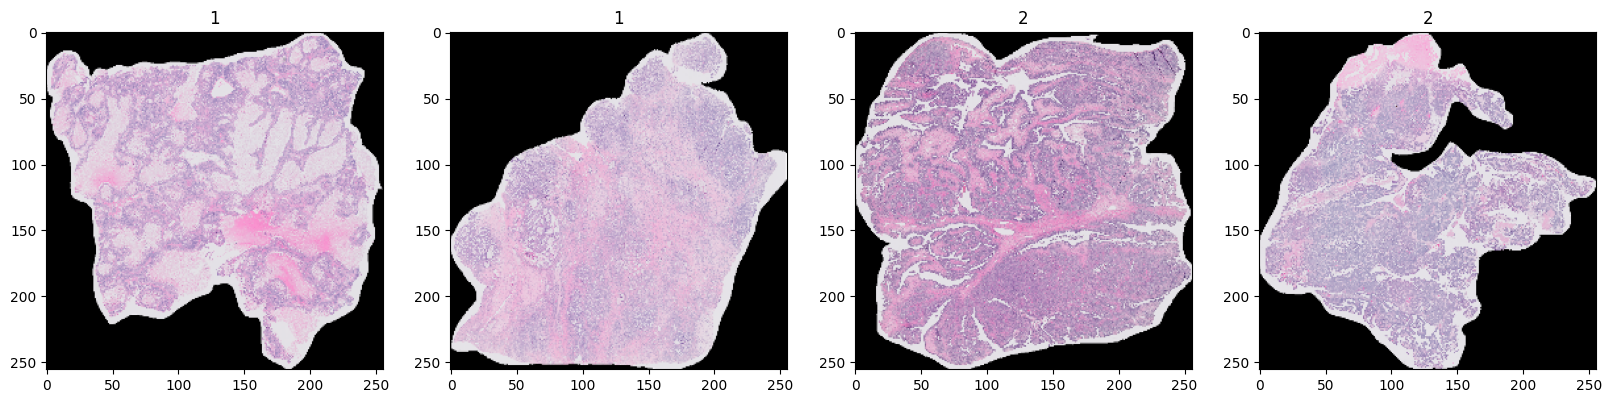

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [20]:
data = data.map(lambda x,y: (x/255, y))

In [21]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[1].max()

4

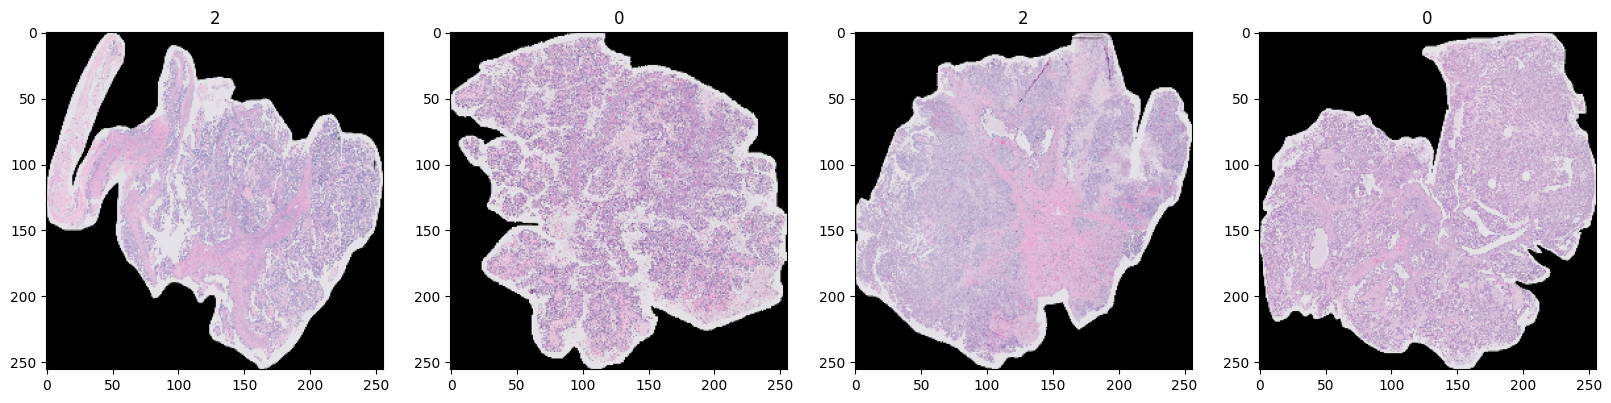

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [23]:
len(data)

17

In [24]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

#
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#
model.add(Flatten())

#
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))